# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ""

# api key
api_key='7b1bbb94583d51a9871aab6fb0cea12c'
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [60]:
print(requests.get(url+'&q=accra').json())

{'coord': {'lon': -0.2, 'lat': 5.56}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 79.54, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1593277814, 'sys': {'type': 1, 'id': 1126, 'country': 'GH', 'sunrise': 1593237034, 'sunset': 1593281824}, 'timezone': 0, 'id': 2306104, 'name': 'Accra', 'cod': 200}


## Generate Cities List

In [61]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,84.365649,-93.861019
1,20.076191,41.867354
2,85.255027,113.765493
3,54.628275,-108.133014
4,82.361679,9.991891


In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# create url with %20 so it works
    # city = city.replace(" ", "%20")

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [63]:
print(cities)

['punta arenas', 'kuche', 'ushuaia', 'bethel', 'beringovskiy', 'san patricio', 'atuona', 'marienburg', 'awbari', 'victoria', 'talnakh', 'victor harbor', 'cachoeiro de itapemirim', 'belushya guba', 'yellowknife', 'nhulunbuy', 'kamenskoye', 'busselton', 'tavares', 'wahran', 'zhigansk', 'kyshtovka', 'albany', 'turtkul', 'mataura', 'ballina', 'kodiak', 'jamestown', 'cape town', 'sandanski', 'pacific grove', 'sao jose da coroa grande', 'meulaboh', 'hasaki', 'bredasdorp', 'kieta', 'grand river south east', 'port hardy', 'onega', 'vaitape', 'gigmoto', 'constitucion', 'north myrtle beach', 'adrar', 'hobart', 'ndioum', 'saint george', 'samusu', 'bandarbeyla', 'bathsheba', 'port alfred', 'sorong', 'mar del plata', 'takaka', 'vaini', 'porto novo', 'rikitea', 'longyearbyen', 'rocha', 'hithadhoo', 'ilulissat', 'castro', 'nikolskoye', 'codrington', 'ngukurr', 'luderitz', 'borovoy', 'hilo', 'qaanaaq', 'wulanhaote', 'doha', 'new norfolk', 'asind', 'mys shmidta', 'aklavik', 'guatire', 'katsuura', 'east

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# Create a DataFrame for weather information
city_weather=pd.DataFrame()

# Create categories to put in dataframe
City_title=[]
Wind_Speed=[]
Humidity=[]
Date=[]
Longitude=[]
Latitude=[]
Max_Temperature=[]
Clouds=[]
Country=[]



In [65]:
# Use a loop to append the data conditionally based on the city

# Initialize the counter of the city data

Count_ = 1

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        Country_= response["sys"]["country"]
        Country.append(response["sys"]["country"])
        Latitude.append(response["coord"]["lat"])
        Longitude.append(response["coord"]["lon"])
        Date.append(response["dt"])
        Wind_Speed.append(response["wind"]["speed"])
        Humidity.append(response["main"]["humidity"])
        Max_Temperature.append(response["main"]["temp_max"])
        Clouds.append(response["clouds"]["all"])
        print(f"looking at {city}. City number is {Count_} ")
        # Making sure length of the list is the same
        City_title.append(city)
        
        Count_ = Count_+1
        # print(f"{city} is found. City number is {Count_}")


        # Add in a delay in order to stay within the limits of API
        # time.sleep()

    # Print city not found if there is no data
    except KeyError:
        print("city not found")
    continue

 
looking at barrow. City number is 101 
looking at rosarito. City number is 102 
looking at swan river. City number is 103 
looking at dinajpur. City number is 104
looking at chokurdakh. City number is 105 
looking at tvoroyri. City number is 106 
looking at torbay. City number is 107 
looking at illapel. City number is 108 
looking at aborlan. City number is 109 
city not found
looking at olafsvik. City number is 110 
looking at palaikastron. City number is 111 
city not found
looking at toamasina. City number is 112 
looking at sobolevo. City number is 113 
looking at ures. City number is 114 
city not found
looking at eureka. City number is 115 
looking at pierre. City number is 116 
looking at laramie. City number is 117 
looking at caravelas. City number is 118 
city not found
looking at pringsewu. City number is 119 
looking at isangel. City number is 120 
looking at dauphin. City number is 121 
city not found
city not found
looking at dikson. City number is 122 
looking at uruc

In [66]:
Weather_dict= {
    'Date':Date,
    'Latitude':Latitude,
    'Longitude':Longitude,
    'City':City_title,
    'Country':Country,
    'Cloud Cover':Clouds,
    'Wind Speed':Wind_Speed,
    'Humidity':Humidity,
    'Max Temperature':Max_Temperature,
    }
Weather_data=pd.DataFrame(Weather_dict)
Weather_data

,Date,Latitude,Longitude,City,Country,Cloud Cover,Wind Speed,Humidity,Max Temperature
0,1593277815,-53.15,-70.92,punta arenas,CL,20,10.29,64,39.20
1,1593277816,-54.80,-68.30,ushuaia,AR,75,19.46,64,37.40
2,1593277816,41.37,-73.41,bethel,US,90,5.82,64,75.99
3,1593277816,63.05,179.32,beringovskiy,RU,0,18.57,72,37.99
4,1593277816,19.22,-104.70,san patricio,MX,75,9.17,63,91.40
...,...,...,...,...,...,...,...,...,...
564,1593277864,-32.03,-52.10,rio grande,BR,40,6.93,47,59.00
565,1593277864,48.92,2.33,saint-denis,FR,90,13.87,60,73.40
566,1593277864,41.00,-115.50,elko,US,1,5.82,15,84.00
567,1593277864,41.96,42.96,khani,GE,93,1.52,80,63.43


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Exporting file to csv
Weather_data.to_csv(r'C:\Users\akibo\Desktop\Columbia Bootcamp\Python-API-Weather\Resources\Weather_Data')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
Weather_data.dtypes

Date                 int64
Latitude           float64
Longitude          float64
City                object
Country             object
Cloud Cover          int64
Wind Speed         float64
Humidity             int64
Max Temperature    float64
dtype: object

In [69]:
#  Get the indices of cities that have humidity over 100%.
Weather_data['Humidity']=Weather_data['Humidity'].astype(int)
Weather_data_h=Weather_data.loc[Weather_data['Humidity']<=100]
Weather_data_h

,Date,Latitude,Longitude,City,Country,Cloud Cover,Wind Speed,Humidity,Max Temperature
0,1593277815,-53.15,-70.92,punta arenas,CL,20,10.29,64,39.20
1,1593277816,-54.80,-68.30,ushuaia,AR,75,19.46,64,37.40
2,1593277816,41.37,-73.41,bethel,US,90,5.82,64,75.99
3,1593277816,63.05,179.32,beringovskiy,RU,0,18.57,72,37.99
4,1593277816,19.22,-104.70,san patricio,MX,75,9.17,63,91.40
...,...,...,...,...,...,...,...,...,...
564,1593277864,-32.03,-52.10,rio grande,BR,40,6.93,47,59.00
565,1593277864,48.92,2.33,saint-denis,FR,90,13.87,60,73.40
566,1593277864,41.00,-115.50,elko,US,1,5.82,15,84.00
567,1593277864,41.96,42.96,khani,GE,93,1.52,80,63.43


In [70]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

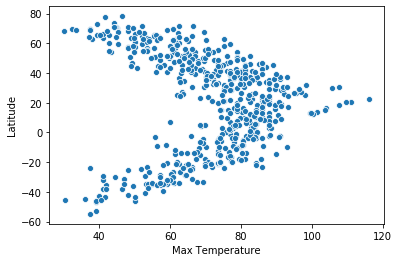

In [71]:
sns.scatterplot(Weather_data_h['Max Temperature'],Weather_data_h['Latitude'])

## Latitude vs. Humidity Plot

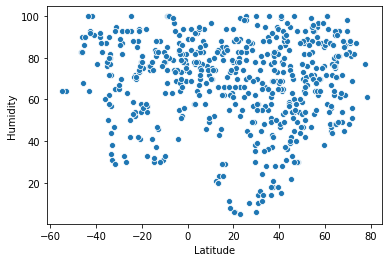

In [72]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Humidity'])

## Latitude vs. Cloudiness Plot

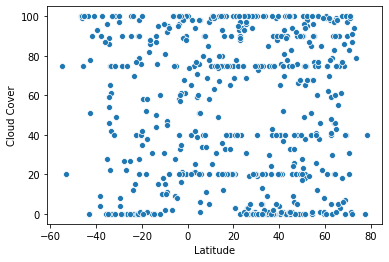

In [73]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Cloud Cover'])

## Latitude vs. Wind Speed Plot

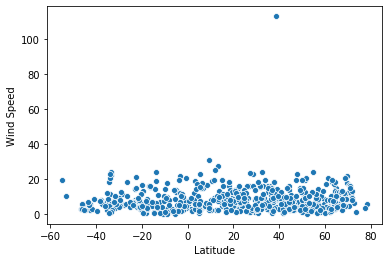

In [74]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Wind Speed'])

## Linear Regression

In [76]:
# Create Northern and Southern Hemisphere DataFrames
Weather_data_hn=Weather_data_h.loc[Weather_data_h['Latitude']>=0]
Weather_data_hs=Weather_data_h.loc[Weather_data_h['Latitude']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

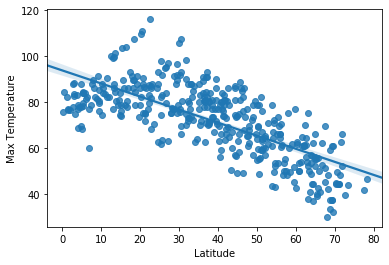

In [77]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Max Temperature'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

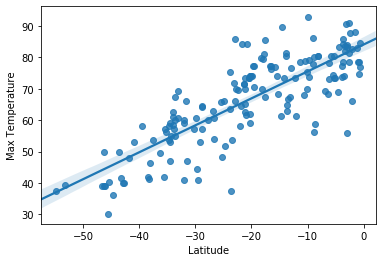

In [78]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Max Temperature'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

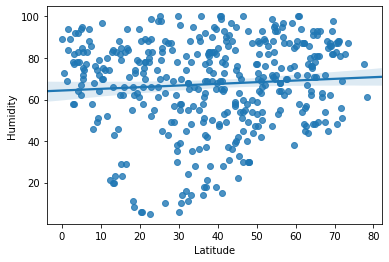

In [79]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

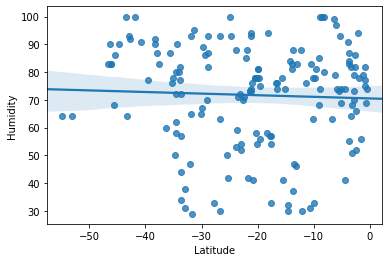

In [80]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

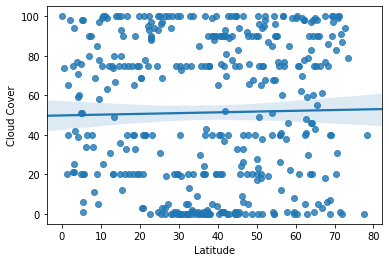

In [81]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Cloud Cover'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

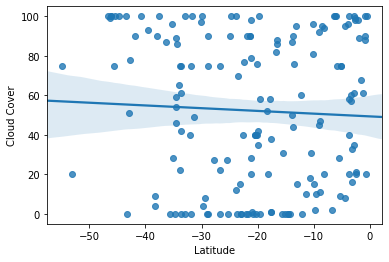

In [82]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Cloud Cover'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

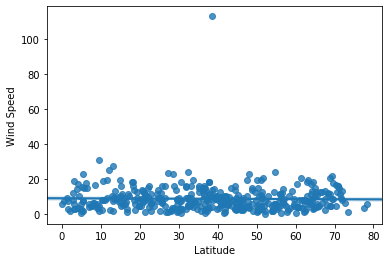

In [83]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Wind Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

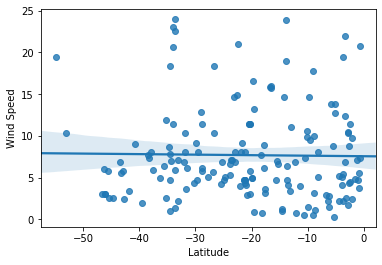

In [84]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Wind Speed'])

In [ ]:
# Conclusion
# You can see that as you go closer to the equator, the maximum temperature rises
# Wind speed shows no correlation to latitude
# Most of the wind speeds globally do not go over 20 mph